In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sbn
import statistics as sts

ModuleNotFoundError: No module named 'pandas'

### Preparar dados:

In [3]:
# Importar os dados do arquivo ".csv" e armazená-los na variável "dataset":
# (O arquivo a ser importado precisa estar dentro da mesma pasta do arquivo ".ipynb")
dataset =  pd.read_csv('Churn.csv', sep = ';')

# Visualizar dados importados de um arquivo ".csv" e armazenados na variável "dataset":
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
# Verificar o tamanho do dataset (linhas, colunas):

print("(Qtd linhas, Qtd colunas)")
dataset.shape

(Qtd linhas, Qtd colunas)


(999, 12)

In [5]:
# Nomear as colunas X:
dataset.columns = ['id', 'score', 'estado', 'genero', 'idade', 'patrimônio', 'saldo', 'produtos', 'tem_cart_credito', 'ativo', 'salario', 'saiu',]
dataset.head()


,id,score,estado,genero,idade,patrimônio,saldo,produtos,tem_cart_credito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


### Explorar dados categóricos:

In [6]:
# Verificar os dados categórigos da coluna "estado" → GROUPBY:
agrupar_estado = dataset.groupby(['estado']).size()

# Exibir com classificação do Maior para o Menor → SORT_VALUES(ASCENDING = FALSE):
agrupar_estado.sort_values(ascending = False)

estado
RS    478
SC    258
PR    257
SP      4
RP      1
TD      1
dtype: int64

↑ repare que há estados errados como: RP e TD

In [7]:
# Verificar os dados categórigos da coluna "genero" → GROUPBY:
agrupar_genero = dataset.groupby(['genero']).size()

agrupar_genero.sort_values(ascending = False)

genero
Masculino    521
Feminino     461
M              6
F              2
Fem            1
dtype: int64

↑ repare que há gêneros despadronizados

<AxesSubplot:xlabel='genero'>

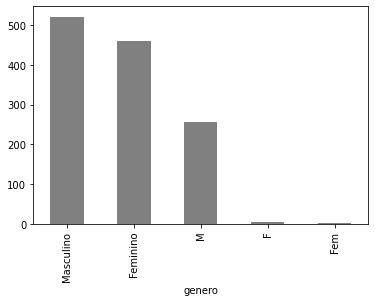

In [8]:
# Plotar gráfico categórico do "estado"
#agrupar_estado.plot.bar(color = 'gray')
agrupar_estado.sort_values(ascending = False).plot.bar(color = 'gray') #← por ordem decrescente

# Plotar gráfico categórico do "genero"
#agrupar_genero.plot.bar(color = 'gray')
agrupar_genero.sort_values(ascending = False).plot.bar(color = 'gray') #← por ordem decrescente

### Explorar dados numéricos:

In [9]:
# Verificar os dados numéricos da coluna "score" → DESCRIBE:
#dataset['score'].describe()
round(dataset['score'].describe(), 2) # ← arredondar com duas casas decimais 00,00


count    999.00
mean     648.62
std       98.26
min      376.00
25%      580.00
50%      653.00
75%      721.00
max      850.00
Name: score, dtype: float64

↑ Interpretação dos dados:
* A média = 648 e a mediana = 653, ou seja, como estão próximos, indicam que os dados estão normalmente distribuídos

c:\Users\guifp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'score')

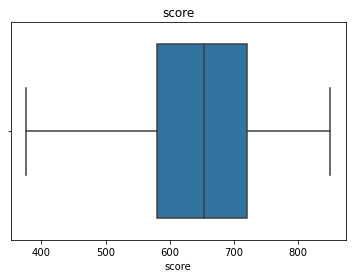

In [10]:
# Plotar gráfico numérico BoxPlot do "score"
sbn.boxplot(dataset['score']).set_title('score')

↑ Interpretação do gráfico: 
* Na primeira linha vê-se a mínima = 376 (próximo de 400) (mínimo excluindo outlier)
* Na última linha vê-se a máxima = 850 (próximo de 800) (máximo excluindo outlier)
* A linha do 1º quartil = 580 (próximo de 600)
* A linha do 3º quartil = 721 (próximo de 700)
* A linha da mediana = 653 (entre 600 e 700)

c:\Users\guifp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'score')

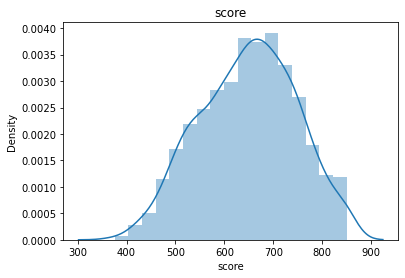

In [11]:
# Plotar gráfico numérico distribuição do "score"
sbn.distplot(dataset['score']).set_title('score')

↑ Interpretação do gráfico:
* O gráfico acima é equivalente ao gráfico anterior de boxplot, pois os números são os mesmo: média = 653, mínimo = 376, máximo = 850, etc

In [12]:
# Verificar os dados numéricos da coluna "idade" → DESCRIBE:
#dataset['idade'].describe()
round(dataset['idade'].describe(), 0)

count    999.0
mean      39.0
std       11.0
min      -20.0
25%       32.0
50%       37.0
75%       44.0
max      140.0
Name: idade, dtype: float64

↑ Interpretação dos dados: 
* Equivocadamente há idade negativa no conjunto de idades e uma idade absurda de 140 anos

c:\Users\guifp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'idade')

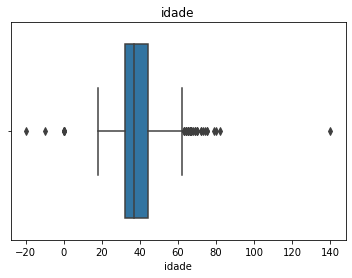

In [13]:
# Plotar gráfico numérico BoxPlot do "idade"
sbn.boxplot(dataset['idade']).set_title('idade')

↑ Interpretação do gráfico:
* Menores de 18 anos são outliers
* 25% das idades variam entre 18 e 30 anos (idades mais espaçadas)
* 25% das idades variam entre 31 e 37 anos (concentração maior de idades próximas)
* 25% das idades variam entre 38 e 44 anos (concentração maior de idades próximas)
* 25% das idades variam entre 45 e 60 anos (idades mais espaçadas)
* Maiores de 61 anos são outliers

Fórmula de outlier: 
* LIMITE SUPERIOR = Q3 + (1,5 * (Q3 - Q1))
* LIMITE INFERIOR = Q1 - (1,5 * (Q3 - Q1))

Cálculo de outlier: 
* LIMITE SUPERIOR = 44 + (1,5 * (44 - 32)) = 62
* LIMITE INFERIOR = Q1 - (1,5 * (Q3 - Q1)) = 14

c:\Users\guifp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'idade')

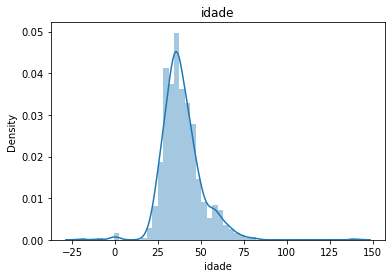

In [14]:
# Plotar gráfico numérico distribuição do "idade"
sbn.distplot(dataset['idade']).set_title('idade')

In [15]:
# Verificar os dados numéricos da coluna "saldo" → DESCRIBE:
dataset['saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: saldo, dtype: float64

↑ Interpretação dos dados:

Notação científica: 
* 5.67 x 10^-5 → 5.67e-05 → 0,**00005**67 → muito pequeno
* 5.67 x 10^ 5 → 5.67e+05 → 5**67000**, → muito grande

c:\Users\guifp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'saldo')

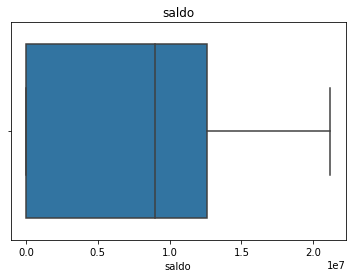

In [16]:
# Plotar gráfico numérico BoxPlot do "saldo"
sbn.boxplot(dataset['saldo']).set_title('saldo')

↑ Interpretação do gráfico:
* O saldo começa em zero, pois há pessoas que não tem dinheiro em conta;
* A escala do gráfico é de 1e7, ou seja, 1e+07 → 1*10^7 → 10.000.000 → 10 milhões
* A mediana é de ~ 8MM
* Não há outliers da distribuição dos dados

c:\Users\guifp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'saldo')

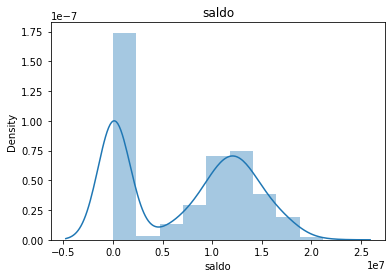

In [17]:
# Plotar gráfico numérico distribuição do "idade"
sbn.distplot(dataset['saldo']).set_title('saldo')

↑ Interpretação do gráfico:
* É grande a quantidade de clientes com a conta zerada
* Seguida dos clientes com cerca de 1 e 1,5 MM

In [18]:
# Verificar os dados numéricos da coluna "salario" → DESCRIBE:
dataset['salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

c:\Users\guifp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'salario')

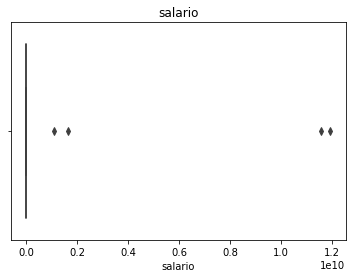

In [19]:
# Plotar gráfico numérico BoxPlot do "salario"
sbn.boxplot(dataset['salario']).set_title('salario')

↑ Interpretação do gráfico:
* Possivelmente os clientes não cadastraram ou não recebem o salário no banco

c:\Users\guifp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'salario')

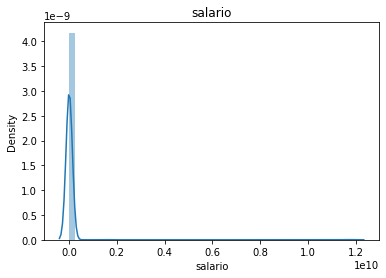

In [20]:
# Plotar gráfico numérico distribuição do "salario"
sbn.distplot(dataset['salario']).set_title('salario')

In [21]:
# Verificar dados NaN (Not a Number)
# O NaN é uma constante que indica que o valor fornecido não é um número - Not a Number.
# Observe que nan e NULL são duas coisas diferentes. O valor NULL indica algo que não existe e está vazio.
dataset.isnull()
dataset.isnull().sum()


id                  0
score               0
estado              0
genero              8
idade               0
patrimônio          0
saldo               0
produtos            0
tem_cart_credito    0
ativo               0
salario             7
saiu                0
dtype: int64

### Tratar os dados

In [22]:
# Substituir NaN pela Mediana na coluna salário:

# 1. Entender os dados → DESCRIBE:
dataset['salario'].describe()

# 2. Armazenar a mediana em uma variável → MEDIAN:
salario_mediana = sts.median(dataset['salario'])

# 3. Substituir NaN pela Mediana → FILLNA:
dataset['salario'].fillna(salario_mediana, inplace = True)

# 4. Validar se ainda há NaN → ISNULL: 
dataset['salario'].isnull().sum()

0

In [23]:
# Padronizar o gênero na referida coluna:

# A. Um único item a ser corrigido:
dataset.loc[dataset['genero'] == 'M', 'genero'] = 'Masculino' # ← condição lógica: se for "M" subsititui por "Masculino"

# B. Mais de um ítem a ser corrigido → ISIN:
dataset.loc[dataset['genero'].isin(['F', 'Fem']), 'genero'] = 'Feminino' # ← usa-se o operador de conjunto "está em" por ter mais de um item a ser corrigido 

# Exibir o resultado das alterações:
genero_agrupado = dataset.groupby(['genero']).size()
genero_agrupado.sort_values(ascending = True)

genero
Feminino     464
Masculino    527
dtype: int64

In [24]:
# Corrigir o intervalo de idade:

# 1. Verificar quais são os itens que estão com a idade errada (abaixo de zero OU maior que 120):
dataset.loc[(dataset['idade'] < 0) | (dataset['idade'] > 120)] 

# 2. Armazenar o valor da mediana da idade em uma variável:
idade_mediana = sts.median(dataset['idade'])

# 3. Substituir valores de idade absurdos pela mediana:
dataset.loc[(dataset['idade'] < 0) | (dataset['idade'] > 120), 'idade'] = idade_mediana

# 4. Verificar que não há mais itens com a idade errada (abaixo de zero OU maior que 120):
dataset.loc[(dataset['idade'] < 0) | (dataset['idade'] > 120)] 

,id,score,estado,genero,idade,patrimônio,saldo,produtos,tem_cart_credito,ativo,salario,saiu


In [25]:
# Tratar itens duplicados:

# 1. Verificar se há itens duplicados pela coluna "id":
dataset[dataset.duplicated(['id'], keep = False)]

# 2. Excluir item pelo código de identificação (id) → DROP:
dataset.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

# 3. Verificar se ainda há itens duplicados pela coluna "id":
dataset[dataset.duplicated(['id'], keep = False)]

,id,score,estado,genero,idade,patrimônio,saldo,produtos,tem_cart_credito,ativo,salario,saiu


In [26]:
# Tratar estados errados que não são do SUL:

# 1. Verificar quais itens estão errados:
estado_agrupado = dataset.groupby(['estado']).size()
estado_agrupado.sort_values(ascending = False)

# 2. Subsituir pelo que aparece mais (MODA):
dataset.loc[dataset['estado'].isin(['RP', 'TD', 'SP']), 'estado'] = 'RS'

# 3. Verificar novamente se ainda há itens que estão errados:
estado_agrupado = dataset.groupby(['estado']).size()
estado_agrupado.sort_values(ascending = False)

estado
RS    483
SC    258
PR    257
dtype: int64

In [27]:
# Tratar os dados de salários (usando 2 desvios padrão)

# Armazenar o desvio padrão da coluna 'salario' na variável "desv":
salario_desv = sts.stdev(dataset['salario'])

# Armazenar a mediana da coluna 'salario' na variável
salario_mediana = sts.median(dataset['salario'])

# Estabelecer critério para identificar quais itens o atende:
dataset.loc[dataset['salario'] >= 2 * salario_desv]

# Localizar quais salários são 2 vezes maiores que o desvio padrão e corrigi-los para a mediana:
dataset.loc[dataset['salario'] >= 2 * salario_desv, 'salario'] = salario_mediana

In [28]:
dataset.shape

(998, 12)

In [29]:
dataset.head(15)

,id,score,estado,genero,idade,patrimônio,saldo,produtos,tem_cart_credito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,14975671.0,1
6,7,822,RS,Masculino,50,7,0,2,1,1,100628.0,0
7,8,376,PR,Feminino,29,4,11504674,4,1,0,8637195.5,1
8,9,501,RS,Masculino,44,4,14205107,2,0,1,749405.0,0
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7172573.0,0
